# Visualizing the tree structure

In case you want to additionally visualize the tree structure on the data, you will have to install the pygraphviz library, which also requires the software Graphviz as explained [here](https://pygraphviz.github.io/documentation/stable/install.html)

As it can be cumbersome to install this, we recommend the following visualizations only for expert users.

We again use the tissue data and assume differential analysis of this data has been carried out (i.e. you have executed the [differential_expression.ipynb](differential_expression.ipynb))

In [1]:
RESULTS_DIRECTORY = "./data/mouse_tissues/results_pairwise_analysis"
SAMPLEMAP_FILE = "./data/mouse_tissues/samplemap_200.tsv"

In [2]:
import pandas as pd
proteoform_df = pd.read_csv(RESULTS_DIRECTORY + "/spleen_VS_testis.proteoforms.tsv", sep='\t')
display(proteoform_df)

,protein,proteoform_id,cluster,is_reference,peptides,num_peptides,quality_score,log2fc,fraction_of_peptides,fcdiff
0,A0A0A0MQM0;P63242,A0A0A0MQM0;P63242_0,0,True,SEQ_VHLVGIDIFTGK_;SEQ_EDLRLPEGDLGK_;SEQ_RNDFQL...,3,0.900000,-0.167828,1.00,0.000000
1,A0A0R4J1N9;P40630;P40630-2,A0A0R4J1N9;P40630;P40630-2_0,0,True,SEQ_SWEEQMAEVGR_;SEQ_FSTEQLPK_;SEQ_SAYNIYVSESF...,5,0.250000,0.263662,1.00,0.000000
2,A0A0R4J2B2;Q6WVG3,A0A0R4J2B2;Q6WVG3_0,0,True,SEQ_FNFLEQAFDK_;SEQ_MFTQQQPQELAR_;SEQ_YILDYLR_,3,0.100000,2.831419,1.00,0.000000
3,A0A1B0GRR3;P62281,A0A1B0GRR3;P62281_0,0,True,SEQ_EAIEGTYIDK_;SEQ_DYLHYIR_,2,0.300000,-0.568436,0.67,0.000000
4,A0A1B0GRR3;P62281,A0A1B0GRR3;P62281_1,1,False,SEQ_VLLGETGK_,1,0.116667,-0.013920,0.33,0.554516
...,...,...,...,...,...,...,...,...,...,...
100,Q9WTL7,Q9WTL7_0,0,True,SEQ_FGALTAEK_;SEQ_ETAAVIFLHGLGDTGHSWADALSTIR_,2,0.256250,1.369196,1.00,0.000000
101,Q9WUM5,Q9WUM5_0,0,True,SEQ_PVVSFIAGITAPPGR_;SEQ_QGTFHSQQALEYGTK_;SEQ_...,4,0.477083,-0.055267,1.00,0.000000
102,Q9WVA2,Q9WVA2_0,0,True,SEQ_SKPVFSESLSD_;SEQ_FIDTSQFILNR_,2,0.300000,-0.257475,1.00,0.000000
103,Q9Z0N1,Q9Z0N1_0,0,True,SEQ_NEVLMVNIGSLSTGGR_;SEQ_VGQEIEVRPGIVSK_;SEQ_...,5,0.350000,-0.725947,0.71,0.000000


In [3]:
import alphaquant.utils.diffquant_utils as aq_diffquant_utils

proteoform_df_filtered = aq_diffquant_utils.filter_proteoform_df(proteoform_df=proteoform_df, min_num_peptides=1, fcdiff_cutoff=0.5)
display(proteoform_df_filtered)

,protein,proteoform_id,cluster,is_reference,peptides,num_peptides,quality_score,log2fc,fraction_of_peptides,fcdiff
4,A0A1B0GRR3;P62281,A0A1B0GRR3;P62281_1,1,False,SEQ_VLLGETGK_,1,0.116667,-0.013920,0.33,0.554516
15,D3Z041;P41216,D3Z041;P41216_1,1,False,SEQ_LLLEGVENK_;SEQ_SQIDELYATIK_;SEQ_IFGQANTSLK...,5,0.200000,-4.417878,0.38,0.503580
42,P35235-1,P35235-1_1,1,False,SEQ_SGMVQTEAQYR_,1,0.100000,0.774771,0.20,0.604678
82,Q99LC3,Q99LC3_1,1,False,SEQ_VVEDIEYLK_,1,0.100000,0.415395,0.10,1.298227
104,Q9Z0N1,Q9Z0N1_1,1,False,SEQ_AGGEGGVTLGQPHLSR_;SEQ_LTPLSHEVISR_,2,0.400000,-0.135647,0.29,0.590301
3,A0A1B0GRR3;P62281,A0A1B0GRR3;P62281_0,0,True,SEQ_EAIEGTYIDK_;SEQ_DYLHYIR_,2,0.300000,-0.568436,0.67,0.000000
14,D3Z041;P41216,D3Z041;P41216_0,0,True,SEQ_VLQPTIFPVVPR_;SEQ_AILDDLLK_;SEQ_LVDVEEMNYL...,8,0.350000,-4.921458,0.62,0.000000
41,P35235-1,P35235-1_0,0,True,SEQ_WFHPNITGVEAENLLLTR_;SEQ_FDSLTDLVEHYK_;SEQ_...,4,0.270000,1.379449,0.80,0.000000
81,Q99LC3,Q99LC3_0,0,True,SEQ_TEVLNYTTIPVYLPEITIGAHQGSR_;SEQ_LLQYADALEHL...,9,0.400000,-0.882832,0.90,0.000000
103,Q9Z0N1,Q9Z0N1_0,0,True,SEQ_NEVLMVNIGSLSTGGR_;SEQ_VGQEIEVRPGIVSK_;SEQ_...,5,0.350000,-0.725947,0.71,0.000000


A0A1B0GRR3;P62281


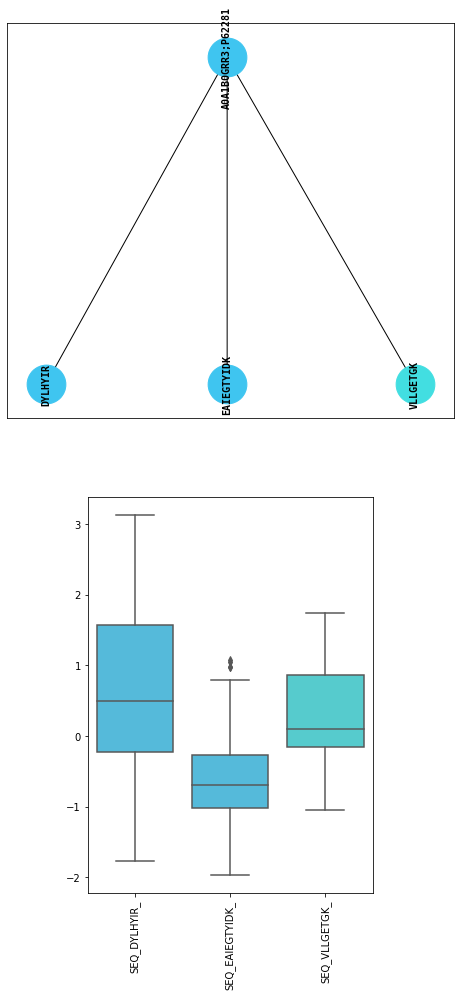

D3Z041;P41216


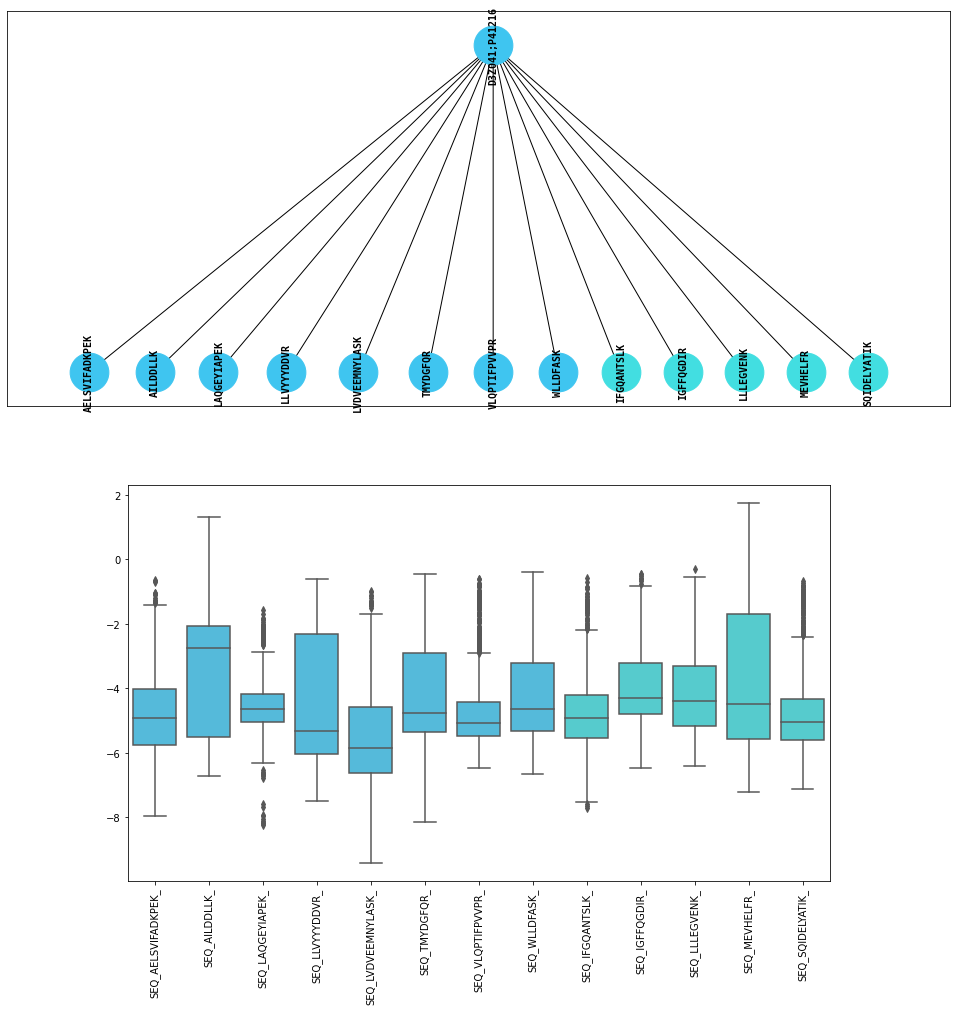

P35235-1


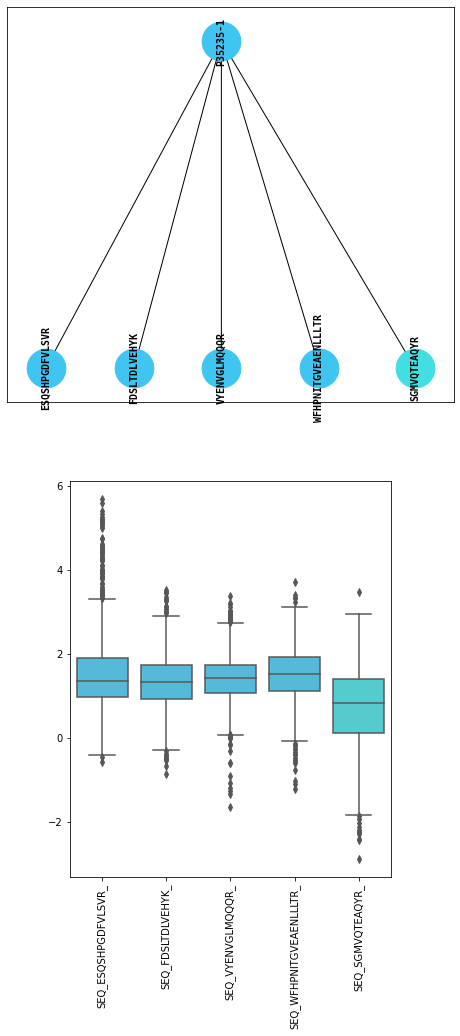

Q99LC3


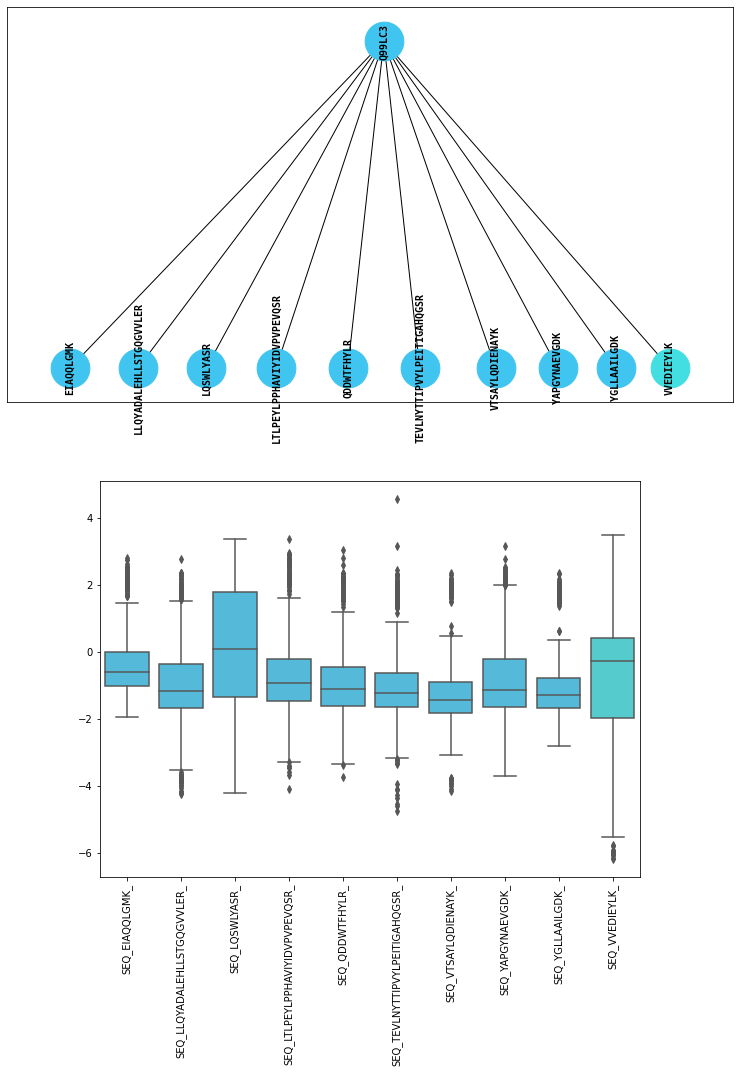

Q9Z0N1


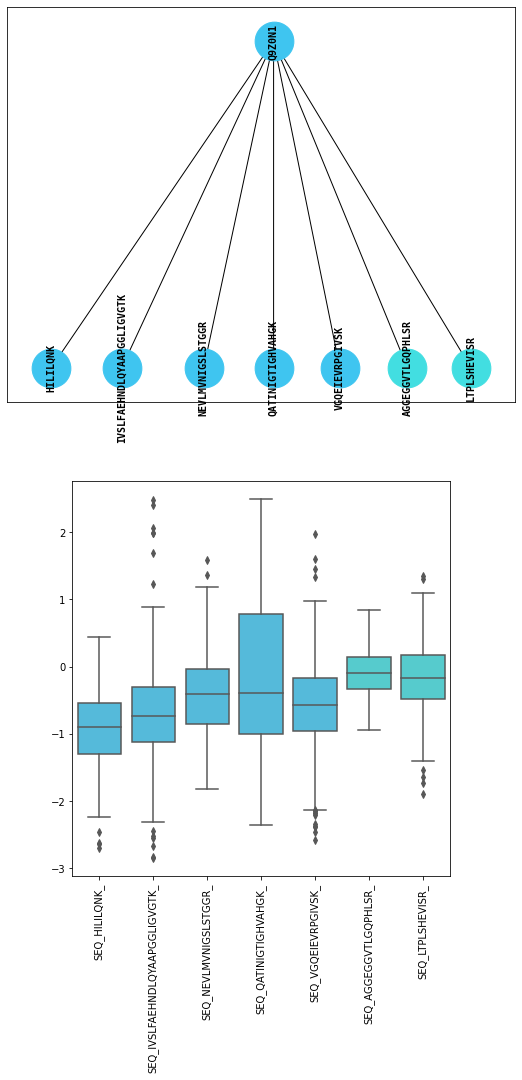

In [4]:
import alphaquant.plotting.fcviz as aq_fcviz
import alphaquant.plotting.tree_and_fc_viz as aq_tree_and_fc_viz
import alphaquant.plotting.base_functions as aq_base_functions
import alphaquant.utils.utils as aq_utils

plotconfig = aq_fcviz.PlotConfig()
plotconfig.colorlist = aq_base_functions.AlphaPeptColorMap().colorlist #change the colorlist to the AlphaPept colorlist, not necessary

quantification_info = aq_fcviz.CondpairQuantificationInfo(("spleen", "testis"), RESULTS_DIRECTORY, SAMPLEMAP_FILE)

#load the trees containing the tree-based quantification info
condpair_tree = aq_utils.read_condpair_tree("spleen", "testis", results_folder=RESULTS_DIRECTORY)

protein2node = {x.name : x for x in condpair_tree.children}
for protein_of_interest in proteoform_df_filtered['protein'].unique():
    print(protein_of_interest)
    protein_node = protein2node[protein_of_interest]
    combined_plotter = aq_tree_and_fc_viz.CombinedTreeAndFCPlotter(protein_node, quantification_info, plotconfig)
        
    

### Looking at quantification details of a specific protein

Let's assume we now want to futher investigate one of the proteins. For this we take Q9WUM5, because it's a relatively small protein

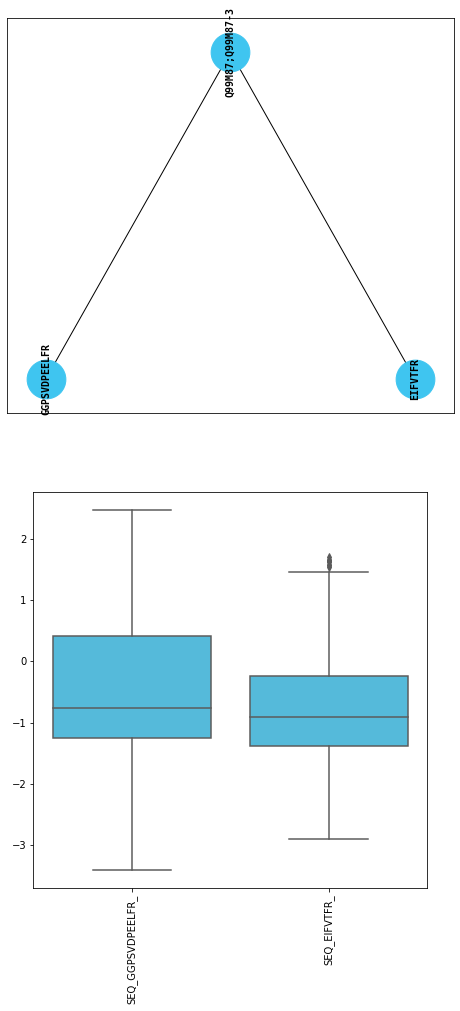

In [5]:
import alphaquant.plotting.fcviz as aq_fcviz
import alphaquant.plotting.tree_and_fc_viz as aq_tree_and_fc_viz
import alphaquant.plotting.base_functions as aq_base_functions

plotconfig = aq_fcviz.PlotConfig()
plotconfig.add_stripplot = False
plotconfig.narrowing_factor_for_fcplot = 0
plotconfig.rescale_factor_y = 2
plotconfig.label_rotation = 90
plotconfig.set_config_to_order_along_protein_sequence(organism="Mouse") #now we order the peptides along the protein sequence
plotconfig.colorlist = aq_base_functions.AlphaPeptColorMap().colorlist
plotconfig.parent_level = "gene"


quantification_info = aq_fcviz.CondpairQuantificationInfo(("spleen", "testis"), RESULTS_DIRECTORY, SAMPLEMAP_FILE)

protein_node = protein2node['Q99M87;Q99M87-3']
combined_plotter = aq_tree_and_fc_viz.CombinedTreeAndFCPlotter(protein_node, quantification_info, plotconfig)




-0.9026062629674738


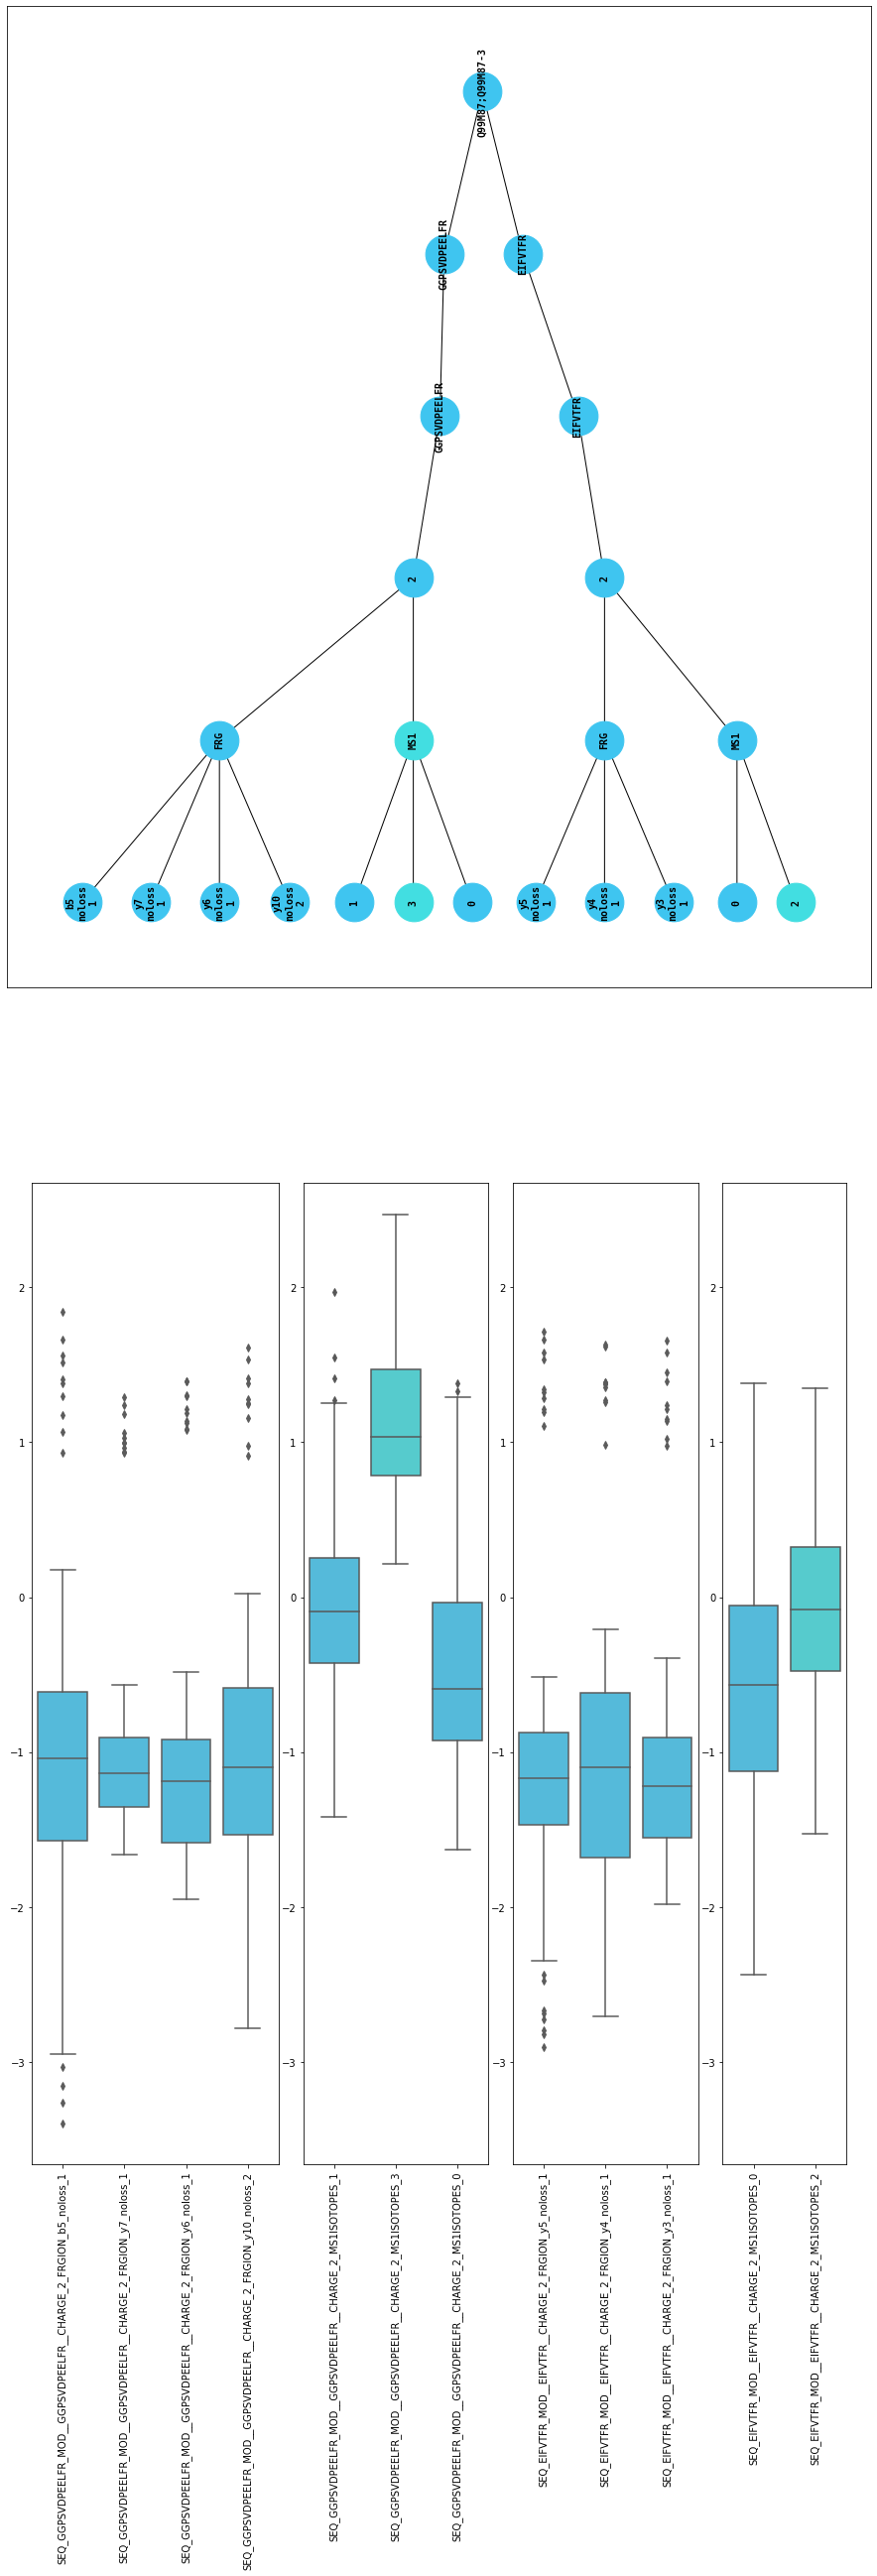

In [6]:
import alphaquant.plotting.fcviz as aq_fcviz
import alphaquant.plotting.tree_and_fc_viz as aq_tree_and_fc_viz
import alphaquant.plotting.base_functions as aq_base_functions

plotconfig = aq_fcviz.PlotConfig()
plotconfig.add_stripplot = False
plotconfig.narrowing_factor_for_fcplot = 0
plotconfig.rescale_factor_y = 2
plotconfig.label_rotation = 90
plotconfig.set_config_to_order_along_protein_sequence(organism="Mouse") #now we order the peptides along the protein sequence
plotconfig.colorlist = aq_base_functions.AlphaPeptColorMap().colorlist
plotconfig.parent_level = "ion_type"


quantification_info = aq_fcviz.CondpairQuantificationInfo(("spleen", "testis"), RESULTS_DIRECTORY, SAMPLEMAP_FILE)

protein_node = protein2node['Q99M87;Q99M87-3']
print(protein_node.fc)
combined_plotter = aq_tree_and_fc_viz.CombinedTreeAndFCPlotter(protein_node, quantification_info, plotconfig)




This allows us to inspect everything in detail. As we can see for example, peptide HLGPVFNTVK in charge state 3 has inconsistent MS1 and MS2 quantification and therefore the charge state 2 peptide is chosen. Overall quantification looks very consistent, but we see differences on the peptide level, potentially due to proteoforms.